In [1]:
# MAC
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.mnist import load_data
# ((訓練用圖片, 訓練答案), (驗證圖片, 驗證答案))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


是什麼? 5


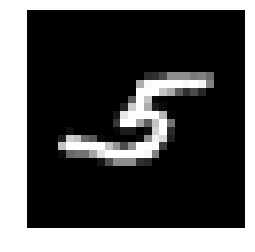

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, x_train.shape[0]-1)
plt.axis("off")
print("是什麼?", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [5]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,141,141,141,121,128,107,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,254,254,247,254,244,129,0,0,0,0


In [6]:
# 圖片處理:1. 攤開:reshape  2. 為了符合keras預期輸入: 0-255 -> 0-1
x_train_reshape = x_train.reshape(60000, 784) / 255
x_test_reshape = x_test.reshape(10000, 784) / 255
# x_train_reshape[c]

In [7]:
# 答案處理: 多個機率(One-Hot Encoding)
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本:", y_train[0])
print("轉化:", y_train_cat[0])

原本: 5
轉化: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一層要特別注意, input_dim
# 784 * 256 + 256(bias)
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 確定模型訓練方式
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [10]:
# batch: 看多少筆資料做一次梯度下降(修正參數)
# epoch: 整份資料看幾次(決定我們什麼要停止模型的訓練)
# epoch 10, batch 200: 60000 * 10 / 200 = 3000梯度下降
# 停止模型訓練: 欠擬合 -> 過擬合 (沒有看過的資料)
# verbose: 印log幅度 1: 進度條 0:完全不印 2:只印必要的
mlp.fit(x_train_reshape, y_train_cat,
        batch_size=200, epochs=10,
        validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 3s - loss: 0.3717 - acc: 0.8977 - val_loss: 0.1661 - val_acc: 0.9553
Epoch 2/10
 - 1s - loss: 0.1644 - acc: 0.9529 - val_loss: 0.1228 - val_acc: 0.9665
Epoch 3/10
 - 1s - loss: 0.1138 - acc: 0.9677 - val_loss: 0.0928 - val_acc: 0.9750
Epoch 4/10
 - 1s - loss: 0.0852 - acc: 0.9755 - val_loss: 0.0864 - val_acc: 0.9782
Epoch 5/10
 - 1s - loss: 0.0672 - acc: 0.9805 - val_loss: 0.0796 - val_acc: 0.9762
Epoch 6/10
 - 1s - loss: 0.0540 - acc: 0.9847 - val_loss: 0.0752 - val_acc: 0.9778
Epoch 7/10
 - 1s - loss: 0.0434 - acc: 0.9883 - val_loss: 0.0726 - val_acc: 0.9797
Epoch 8/10
 - 1s - loss: 0.0360 - acc: 0.9905 - val_loss: 0.0642 - val_acc: 0.9807
Epoch 9/10
 - 2s - loss: 0.0292 - acc: 0.9929 - val_loss: 0.0672 - val_acc: 0.9790
Epoch 10/10
 - 2s - loss: 0.0240 - acc: 0.9947 - val_loss: 0.0641 - val_acc: 0.9838
